In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
csv_directory = '/content/drive/MyDrive/Yazan/data'
#for consistency, the directory is included in all functions
#this is because I have different datasets

In [ ]:
csv_files = [f for f in os.listdir(csv_directory) if f.endswith('.csv')]

In [ ]:
print(csv_files)

['DataTable025.csv', 'DataTable027.csv', 'DataTable028.csv', 'DataTable029.csv', 'DataTable030.csv', 'DataTable031.csv', 'DataTable032.csv', 'DataTable034.csv', 'DataTable037.csv', 'DataTable038.csv', 'DataTable039.csv', 'DataTable040.csv', 'DataTable041.csv', 'DataTable042.csv', 'DataTable044.csv', 'DataTable045.csv', 'DataTable047.csv', 'DataTable048.csv', 'DataTable049.csv', 'DataTable050.csv', 'DataTable052.csv', 'DataTable053.csv', 'DataTable055.csv', 'DataTable058.csv', 'DataTable059.csv', 'DataTable063.csv', 'DataTable065.csv', 'DataTable066.csv', 'DataTable068.csv', 'DataTable024.csv', 'DataTable026.csv', 'DataTable101.csv', 'DataTable102.csv', 'DataTable046.csv', 'DataTable104.csv', 'DataTable105.csv', 'DataTable107.csv', 'DataTable109.csv', 'DataTable110.csv', 'DataTable112.csv', 'DataTable115.csv', 'DataTable121.csv', 'DataTable122.csv', 'DataTable123.csv', 'DataTable124.csv', 'DataTable125.csv', 'DataTable128.csv', 'DataTable130.csv', 'DataTable106.csv', 'DataTable113.csv',

In [ ]:
# Calculate the mean CO2 concentration for each home, by navigating through each CSV file.
# Iterate through CSV files and calculate mean
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    df = pd.read_csv(file_path)

    # Specify the default column name
    default_col_name = 'CO2_ETC_IN1'

    # Try to find the column name in the first row, otherwise using the default
    matching_cols = df.columns[df.columns.str.contains(default_col_name)].tolist()
    col_name = matching_cols[0] if matching_cols else df.columns[3]

    # Removing rows with missing values in the specified column; this is because they are not useful
    df_cleaned = df.dropna(subset=[col_name])

    # Calculate the mean of the cleaned column
    mean_co2 = df_cleaned[col_name].mean()

    print(f"Mean CO2 Concentration for {csv_file}: {mean_co2}")

Mean CO2 Concentration for DataTable025.csv: 466.2131852007127
Mean CO2 Concentration for DataTable027.csv: 474.5637773818258
Mean CO2 Concentration for DataTable028.csv: 748.6134814970122
Mean CO2 Concentration for DataTable029.csv: 688.9300911854103
Mean CO2 Concentration for DataTable030.csv: 561.1757677392307
Mean CO2 Concentration for DataTable031.csv: 572.9594382140236
Mean CO2 Concentration for DataTable032.csv: 708.8856513992243
Mean CO2 Concentration for DataTable034.csv: 581.3760151882713
Mean CO2 Concentration for DataTable037.csv: 495.25489990567024
Mean CO2 Concentration for DataTable038.csv: 815.6178673135745
Mean CO2 Concentration for DataTable039.csv: 762.0153039832285
Mean CO2 Concentration for DataTable040.csv: 821.5069699192957
Mean CO2 Concentration for DataTable041.csv: 656.5775075987842
Mean CO2 Concentration for DataTable042.csv: 606.7915312860288
Mean CO2 Concentration for DataTable044.csv: 858.2429514725919
Mean CO2 Concentration for DataTable045.csv: 610.64385

In [ ]:
#identifying outliers across the different homes; this is not the final calculation
#outliers are computed by investigating the deviations from the mean for every 6 months interval
#this is instead of comparing it to mean of annual concentrations

# Define the directory path
csv_directory = '/content/drive/MyDrive/Yazan/data/'

# List CSV files in the directory
csv_files = [f for f in os.listdir(csv_directory) if f.endswith('.csv')]

# Set z-score threshold for identifying outliers
z_score_threshold = 2

# Iterate through CSV files and identify outliers
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    df = pd.read_csv(file_path)

    # Specify the default column name for CO2 concentrations
    default_col_name = 'CO2_ETC_IN1'

    # Try to find the column name in the first row, otherwise use the default
    matching_cols = df.columns[df.columns.str.contains(default_col_name)].tolist()
    col_name = matching_cols[0] if matching_cols else df.columns[3]

    # Specify the default column name for timestamps
    default_timestamp_col = df.columns[0]  # Assuming timestamps are in the first column

    # Try to find the column name containing timestamps
    timestamp_col = df.columns[df.columns.str.contains('Timestamp')].tolist()
    timestamp_col = timestamp_col[0] if timestamp_col else default_timestamp_col

    # Remove rows with missing values in the specified CO2 column
    df_cleaned = df.dropna(subset=[col_name])

    # Calculate the z-score for each data point in the CO2 column
    z_scores = np.abs((df_cleaned[col_name] - df_cleaned[col_name].mean()) / df_cleaned[col_name].std())

    # Identify outliers based on the z-score threshold
    outliers = df_cleaned.loc[z_scores > z_score_threshold, timestamp_col]

    print(f"Outliers for {csv_file}:\n{outliers}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Outliers for DataTable025.csv:
922     2017-03-24 09:22:00
923     2017-03-24 09:23:00
924     2017-03-24 09:24:00
925     2017-03-24 09:25:00
926     2017-03-24 09:26:00
               ...         
7367    2017-03-28 20:47:00
7370    2017-03-28 20:50:00
7371    2017-03-28 20:51:00
7372    2017-03-28 20:52:00
7373    2017-03-28 20:53:00
Name: Time, Length: 513, dtype: object
Outliers for DataTable027.csv:
4114    2017-06-09 14:34:00
4115    2017-06-09 14:35:00
4116    2017-06-09 14:36:00
4117    2017-06-09 14:37:00
4118    2017-06-09 14:38:00
               ...         
8972    2017-06-12 23:32:00
8973    2017-06-12 23:33:00
8975    2017-06-12 23:35:00
8976    2017-06-12 23:36:00
8977    2017-06-12 23:37:00
Name: Time, Length: 436, dtype: object
Outliers for DataTable028.csv:
0       2017-03-15 18:00:00
1       2017-03-15 18:01:00
2       2017-03-15 18:02:00


In [ ]:
#Calculate average NO2 concentrations for each home

# Define the directory path
csv_directory = '/content/drive/MyDrive/Yazan/data'

# List CSV files in the directory
csv_files = [f for f in os.listdir(csv_directory) if f.endswith('.csv')]

# Iterate through CSV files and calculate mean for NO2 concentrations
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    df = pd.read_csv(file_path)

    # Specifying the default column name for NO2 concentrations
    default_col_name = 'NO2_AQL_IN1'

    # Trying to find the column name in the first row, otherwise use the default
    matching_cols = df.columns[df.columns.str.contains(default_col_name)].tolist()
    col_name = matching_cols[0] if matching_cols else df.columns[8]  # Assuming it's the ninth column (index 8)

    # Convert the values in the NO2 column to numeric
    df[col_name] = pd.to_numeric(df[col_name], errors='coerce')

    # Calculate the mean of the specified NO2 column
    mean_no2 = df[col_name].mean()

    print(f"Mean NO2 Concentration for {csv_file}: {mean_no2}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mean NO2 Concentration for DataTable025.csv: 0.06788051566921706
Mean NO2 Concentration for DataTable027.csv: 15.411306453310875
Mean NO2 Concentration for DataTable028.csv: 0.04985399853264858
Mean NO2 Concentration for DataTable029.csv: 0.002551355384232777
Mean NO2 Concentration for DataTable030.csv: 0.06192946232051148
Mean NO2 Concentration for DataTable031.csv: 25.45325437585159
Mean NO2 Concentration for DataTable032.csv: 0.010209302325581392
Mean NO2 Concentration for DataTable034.csv: 0.008928414212346702
Mean NO2 Concentration for DataTable037.csv: 0.00628833455612617
Mean NO2 Concentration for DataTable038.csv: 0.009922754428256983
Mean NO2 Concentration for DataTable039.csv: 0.0011511309115832763
Mean NO2 Concentration for DataTable040.csv: 0.003195472172728225
Mean NO2 Concentration for DataTable041.csv: 0.037732103553086684
Mean NO2 Concentratio

In [ ]:
#Calculate mean PM2,5 for each home

# Define the directory path
csv_directory = '/content/drive/MyDrive/Yazan/data'

# List CSV files in the directory
csv_files = [f for f in os.listdir(csv_directory) if f.endswith('.csv')]

# Iterate through CSV files and calculate mean for PM2.5 concentrations
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    df = pd.read_csv(file_path)

    # Specify the default column name for PM2.5 concentrations
    default_col_name = 'PM_MET_OUT'

    # Try to find the column name in the first row, otherwise use the default
    matching_cols = df.columns[df.columns.str.contains(default_col_name)].tolist()
    col_name = matching_cols[0] if matching_cols else df.columns[1]  # Assuming it's the second column (index 1)

    # Drop rows with missing values in the specified PM2.5 column
    df_cleaned = df.dropna(subset=[col_name])

    # Convert the values in the PM2.5 column to numeric
    df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')

    # Calculate the mean of the specified PM2.5 column
    mean_pm25 = df_cleaned[col_name].mean()

    print(f"Mean PM2.5 Concentration for {csv_file}: {mean_pm25}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mean PM2.5 Concentration for DataTable025.csv: 3.6527617650141493
Mean PM2.5 Concentration for DataTable027.csv: 4.396497222513363
Mean PM2.5 Concentration for DataTable028.csv: 2.690326380882507
Mean PM2.5 Concentration for DataTable029.csv: 3.142131852007127
Mean PM2.5 Concentration for DataTable030.csv: 2.111330049261084
Mean PM2.5 Concentration for DataTable031.csv: 5.207169269468609
Mean PM2.5 Concentration for DataTable032.csv: 4.808136568493868


<ipython-input-24-f24aa9c743c6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')
<ipython-input-24-f24aa9c743c6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')


Mean PM2.5 Concentration for DataTable034.csv: 2.7726983440565345
Mean PM2.5 Concentration for DataTable037.csv: 10.279797819935018
Mean PM2.5 Concentration for DataTable038.csv: 6.069184157789263
Mean PM2.5 Concentration for DataTable039.csv: 7.476680431820564
Mean PM2.5 Concentration for DataTable040.csv: 4.518313593962898
Mean PM2.5 Concentration for DataTable041.csv: 4.147075883031129
Mean PM2.5 Concentration for DataTable042.csv: 7.29882842469343
Mean PM2.5 Concentration for DataTable044.csv: 10.688496384026832
Mean PM2.5 Concentration for DataTable045.csv: 13.093399224399958
Mean PM2.5 Concentration for DataTable047.csv: 25.425545225867307
Mean PM2.5 Concentration for DataTable048.csv: 2.7812863431506134
Mean PM2.5 Concentration for DataTable049.csv: 4.76711994480416
Mean PM2.5 Concentration for DataTable050.csv: 6.570051693026217
Mean PM2.5 Concentration for DataTable052.csv: 10.184879362750237
Mean PM2.5 Concentration for DataTable053.csv: 12.709044368962957
Mean PM2.5 Concentr

<ipython-input-24-f24aa9c743c6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')
<ipython-input-24-f24aa9c743c6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')
<ipython-input-24-f24aa9c743c6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Mean PM2.5 Concentration for DataTable104.csv: 23.78623613514252
Mean PM2.5 Concentration for DataTable105.csv: 11.159851902316321
Mean PM2.5 Concentration for DataTable107.csv: 11.239018027460434


<ipython-input-24-f24aa9c743c6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')
<ipython-input-24-f24aa9c743c6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')
<ipython-input-24-f24aa9c743c6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Mean PM2.5 Concentration for DataTable109.csv: 16.10279415155644
Mean PM2.5 Concentration for DataTable110.csv: 9.718700031443246
Mean PM2.5 Concentration for DataTable112.csv: 14.31401761094898


<ipython-input-24-f24aa9c743c6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')
<ipython-input-24-f24aa9c743c6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')
<ipython-input-24-f24aa9c743c6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Mean PM2.5 Concentration for DataTable115.csv: 2.3526717056734356
Mean PM2.5 Concentration for DataTable121.csv: 4.677561788543849
Mean PM2.5 Concentration for DataTable122.csv: 14.48696389660329


<ipython-input-24-f24aa9c743c6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')
<ipython-input-24-f24aa9c743c6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')
<ipython-input-24-f24aa9c743c6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Mean PM2.5 Concentration for DataTable123.csv: 4.717964469133214
Mean PM2.5 Concentration for DataTable124.csv: 5.972938266429096
Mean PM2.5 Concentration for DataTable125.csv: 12.440600991456597


<ipython-input-24-f24aa9c743c6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')
<ipython-input-24-f24aa9c743c6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')
<ipython-input-24-f24aa9c743c6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Mean PM2.5 Concentration for DataTable128.csv: 16.98045980505188
Mean PM2.5 Concentration for DataTable130.csv: 6.015159731684309
Mean PM2.5 Concentration for DataTable106.csv: 7.936768167914776


<ipython-input-24-f24aa9c743c6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')
<ipython-input-24-f24aa9c743c6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')
<ipython-input-24-f24aa9c743c6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Mean PM2.5 Concentration for DataTable113.csv: 21.476720783984913
Mean PM2.5 Concentration for DataTable114.csv: 29.0718447751808
Mean PM2.5 Concentration for DataTable116.csv: 13.189253746986688


<ipython-input-24-f24aa9c743c6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')
<ipython-input-24-f24aa9c743c6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')
<ipython-input-24-f24aa9c743c6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Mean PM2.5 Concentration for DataTable117.csv: 26.39923376741645
Mean PM2.5 Concentration for DataTable127.csv: 5.398445861032693


<ipython-input-24-f24aa9c743c6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')


In [ ]:
#Calculate Average Temperature for each home

# Define the directory path
csv_directory = '/content/drive/MyDrive/Yazan/data'

# List CSV files in the directory
csv_files = [f for f in os.listdir(csv_directory) if f.endswith('.csv')]

# Iterate through CSV files and calculate mean for temperature
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    df = pd.read_csv(file_path)

    # Specify the default column name for temperature
    default_col_name = 'T_ETC_IN1'

    # Try to find the column name in the first row, otherwise use the default
    matching_cols = df.columns[df.columns.str.contains(default_col_name)].tolist()
    col_name = matching_cols[0] if matching_cols else df.columns[12]  # Assuming it's the thirteenth column (index 12)

    # Drop rows with missing values in the specified temperature column
    df_cleaned = df.dropna(subset=[col_name])

    # Convert the values in the temperature column to numeric
    df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')

    # Calculate the mean of the specified temperature column
    mean_temperature = df_cleaned[col_name].mean()

    print(f"Mean Temperature for {csv_file}: {mean_temperature}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mean Temperature for DataTable025.csv: 17.771376166020335
Mean Temperature for DataTable027.csv: 21.345749921391885
Mean Temperature for DataTable028.csv: 24.273461901268213
Mean Temperature for DataTable029.csv: 24.42560528246515
Mean Temperature for DataTable030.csv: 20.08569332355099
Mean Temperature for DataTable031.csv: 25.45325437585159
Mean Temperature for DataTable032.csv: 22.93585578031653
Mean Temperature for DataTable034.csv: 19.338793376226135


<ipython-input-25-44283078267f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')
<ipython-input-25-44283078267f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')


Mean Temperature for DataTable037.csv: 17.857729797715123
Mean Temperature for DataTable038.csv: 22.94216854762156
Mean Temperature for DataTable039.csv: 24.01819515774028
Mean Temperature for DataTable040.csv: 22.948349229640495
Mean Temperature for DataTable041.csv: 23.795576983544702
Mean Temperature for DataTable042.csv: 25.27479299863746
Mean Temperature for DataTable044.csv: 26.414568703490197
Mean Temperature for DataTable045.csv: 26.136474164133737
Mean Temperature for DataTable047.csv: 24.787527512839326
Mean Temperature for DataTable048.csv: 24.397201551200084
Mean Temperature for DataTable049.csv: 24.093588790998833
Mean Temperature for DataTable050.csv: 24.173399851395818
Mean Temperature for DataTable052.csv: 25.461345770883554
Mean Temperature for DataTable053.csv: 22.758061776881437
Mean Temperature for DataTable055.csv: 24.723033648232672
Mean Temperature for DataTable058.csv: 21.612703070956922
Mean Temperature for DataTable059.csv: 21.65290308884407
Mean Temperature f

<ipython-input-25-44283078267f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')
<ipython-input-25-44283078267f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')
<ipython-input-25-44283078267f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Mean Temperature for DataTable101.csv: 23.24035372468701
Mean Temperature for DataTable102.csv: 26.520289553171544
Mean Temperature for DataTable046.csv: 21.687199250078123
Mean Temperature for DataTable104.csv: 26.76028594845642


<ipython-input-25-44283078267f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')
<ipython-input-25-44283078267f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')
<ipython-input-25-44283078267f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Mean Temperature for DataTable105.csv: 26.70791321664396
Mean Temperature for DataTable107.csv: 23.128099779897287
Mean Temperature for DataTable109.csv: 24.71554366078925


<ipython-input-25-44283078267f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')
<ipython-input-25-44283078267f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')
<ipython-input-25-44283078267f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Mean Temperature for DataTable110.csv: 26.42343569856409
Mean Temperature for DataTable112.csv: 27.08092825293879
Mean Temperature for DataTable115.csv: 21.270968035698022


<ipython-input-25-44283078267f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')
<ipython-input-25-44283078267f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')
<ipython-input-25-44283078267f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Mean Temperature for DataTable121.csv: 22.213496038612146
Mean Temperature for DataTable122.csv: 16.221801497732304
Mean Temperature for DataTable123.csv: 22.573063620165602


<ipython-input-25-44283078267f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')
<ipython-input-25-44283078267f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')
<ipython-input-25-44283078267f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Mean Temperature for DataTable124.csv: 19.526538098731788
Mean Temperature for DataTable125.csv: 20.659919839679358
Mean Temperature for DataTable128.csv: 22.98459280997799


<ipython-input-25-44283078267f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')
<ipython-input-25-44283078267f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')
<ipython-input-25-44283078267f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Mean Temperature for DataTable130.csv: 21.360874122209413
Mean Temperature for DataTable106.csv: 23.732538761733995
Mean Temperature for DataTable113.csv: 22.502221989309295
Mean Temperature for DataTable114.csv: 19.934577088355518
Mean Temperature for DataTable116.csv: 20.685881983020646
Mean Temperature for DataTable117.csv: 22.45813678171387
Mean Temperature for DataTable127.csv: 21.99923504234587


<ipython-input-25-44283078267f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')
<ipython-input-25-44283078267f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col_name] = pd.to_numeric(df_cleaned[col_name], errors='coerce')
<ipython-input-25-44283078267f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [ ]:
!pip install matplotlib

In [ ]:
#this is an initial correlation matrix only between the four IAQ parameters
#this was adapted to another version that accounts for infiltration and ventilation rates

# Define the directory path
csv_directory = '/content/drive/MyDrive/Yazan/data'

# List CSV files in the directory
csv_files = [f for f in os.listdir(csv_directory) if f.endswith('.csv')]

# Lists to store mean concentrations for each parameter
mean_pm25_list = []
mean_co2_list = []
mean_no2_list = []
mean_temperature_list = []
csv_file_names = []

# Iterate through CSV files and calculate mean for each parameter
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    df = pd.read_csv(file_path)

    # PM2.5
    pm25_cols = df.columns[df.columns.str.contains('PM_MET_OUT')]
    col_name_pm25 = pm25_cols[0] if not pm25_cols.empty else None

    if col_name_pm25 is not None:
        df_pm25 = df[col_name_pm25].dropna()
        mean_pm25 = df_pm25.mean()
        mean_pm25_list.append(mean_pm25)
    else:
        print(f"PM_MET_OUT column not found in {csv_file}")
        mean_pm25_list.append(None)

    # CO2
    co2_cols = df.columns[df.columns.str.contains('CO2_ETC_IN1')]
    col_name_co2 = co2_cols[0] if not co2_cols.empty else None

    if col_name_co2 is not None:
        df_co2 = df[col_name_co2].dropna()
        mean_co2 = df_co2.mean()
        mean_co2_list.append(mean_co2)
    else:
        print(f"CO2_ETC_IN1 column not found in {csv_file}")
        mean_co2_list.append(None)

    # NO2
    no2_cols = df.columns[df.columns.str.contains('NO2_AQL_IN1')]
    col_name_no2 = no2_cols[0] if not no2_cols.empty else None

    if col_name_no2 is not None:
        df_no2 = df[col_name_no2].dropna()
        mean_no2 = df_no2.mean()
        mean_no2_list.append(mean_no2)
    else:
        print(f"NO2_AQL_IN1 column not found in {csv_file}")
        mean_no2_list.append(None)

    # Temperature
    temperature_cols = df.columns[df.columns.str.contains('T_ETC_IN1')]
    col_name_temperature = temperature_cols[0] if not temperature_cols.empty else None

    if col_name_temperature is not None:
        df_temperature = df[col_name_temperature].dropna()
        mean_temperature = df_temperature.mean()
        mean_temperature_list.append(mean_temperature)
    else:
        print(f"T_ETC_IN1 column not found in {csv_file}")
        mean_temperature_list.append(None)

    # Store CSV file name for x-axis labels
    csv_file_names.append(csv_file)

# Create a DataFrame with the mean concentrations
# Create a DataFrame with the mean concentrations
df_means = pd.DataFrame({
    'Outdoor PM2.5': mean_pm25_list,
    'CO2_ETC_IN1': mean_co2_list,
    'NO2_AQL_IN1': mean_no2_list,
    'T_ETC_IN1': mean_temperature_list
}, columns=['Outdoor PM2.5', 'CO2_ETC_IN1', 'NO2_AQL_IN1', 'T_ETC_IN1'])  # Explicitly set column order

# Calculate the correlation matrix and fill NaN values with zeros
corr_matrix = df_means.corr().fillna(0)

# Custom labels for x-axis (assuming csv_file_names are date labels)
custom_x_labels = csv_file_names  # You can replace this with custom labels if needed
df_means.index = custom_x_labels  # Set custom x-axis labels

# Create a larger heatmap with adjusted parameters
plt.figure(figsize=(14, 12))  # Increase figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, center=0, cbar_kws={'shrink': 0.8})  # Adjust colorbar size

# Set custom x-axis labels
plt.xticks(ticks=range(len(custom_x_labels)), labels=custom_x_labels, rotation=45, fontsize=12)  # Adjust font size

# Set custom y-axis labels
plt.yticks(ticks=range(len(df_means.columns)), labels=df_means.columns, rotation=0, fontsize=12)  # Adjust font size

plt.title('Custom Correlation Heatmap', fontsize=16)  # Adjust title font size
plt.tight_layout()  # Improve layout
plt.show()

In [ ]:
# next component is to determine the mean concentration of QFCM_total and ACH for each home

# Define the new directory path
csv_directory_data2 = '/content/drive/MyDrive/Yazan/data2'

# List CSV files in the new directory
csv_files_data2 = [f for f in os.listdir(csv_directory_data2) if f.endswith('.csv')]

# Dataframe to store mean values for each CSV file
df_means_data2 = pd.DataFrame(columns=['CSV_File', 'Mean_QCFM_Total', 'Mean_ACH'])

# Iterate through CSV files in the new directory
for csv_file_data2 in csv_files_data2:
    file_path_data2 = os.path.join(csv_directory_data2, csv_file_data2)
    df_data2 = pd.read_csv(file_path_data2)

    # Find the column names for 'QCFM_Total' and 'ACH'
    qcfm_cols = df_data2.columns[df_data2.columns.str.contains('QCFM_Total')]
    col_name_qcfm = qcfm_cols[0] if not qcfm_cols.empty else None

    ach_cols = df_data2.columns[df_data2.columns.str.contains('ACH')]
    col_name_ach = ach_cols[0] if not ach_cols.empty else None

    if col_name_qcfm is not None and col_name_ach is not None:
        # Drop rows where either 'QCFM_Total' or 'ACH' is zero or non-existent
        df_cleaned = df_data2[(df_data2[col_name_qcfm] != 0) & (df_data2[col_name_ach] != 0)].dropna(subset=[col_name_qcfm, col_name_ach])

        # Calculate mean values
        mean_qcfm = df_cleaned[col_name_qcfm].mean()
        mean_ach = df_cleaned[col_name_ach].mean()

        # Add values to the DataFrame
        df_means_data2 = df_means_data2.append({'CSV_File': csv_file_data2, 'Mean_QCFM_Total': mean_qcfm, 'Mean_ACH': mean_ach}, ignore_index=True)
    else:
        print(f"'QCFM_Total' or 'ACH' columns not found in {csv_file_data2}")

# Display the DataFrame with mean values
print(df_means_data2)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-32-828bf81e9d0b>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_means_data2 = df_means_data2.append({'CSV_File': csv_file_data2, 'Mean_QCFM_Total': mean_qcfm, 'Mean_ACH': mean_ach}, ignore_index=True)
<ipython-input-32-828bf81e9d0b>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_means_data2 = df_means_data2.append({'CSV_File': csv_file_data2, 'Mean_QCFM_Total': mean_qcfm, 'Mean_ACH': mean_ach}, ignore_index=True)
<ipython-input-32-828bf81e9d0b>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_means_data2 = df_means_data2.append({'CSV_File': csv_file_data2, 'Mean_QCFM_Total': mean_qcfm, 'Mean_ACH': mean_ach}, ignore_index=True)
<ipython-input-32-828bf81e9d0b>:38: FutureWarning: The frame.append

'QCFM_Total' or 'ACH' columns not found in Qtotal029.csv


<ipython-input-32-828bf81e9d0b>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_means_data2 = df_means_data2.append({'CSV_File': csv_file_data2, 'Mean_QCFM_Total': mean_qcfm, 'Mean_ACH': mean_ach}, ignore_index=True)
<ipython-input-32-828bf81e9d0b>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_means_data2 = df_means_data2.append({'CSV_File': csv_file_data2, 'Mean_QCFM_Total': mean_qcfm, 'Mean_ACH': mean_ach}, ignore_index=True)
<ipython-input-32-828bf81e9d0b>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_means_data2 = df_means_data2.append({'CSV_File': csv_file_data2, 'Mean_QCFM_Total': mean_qcfm, 'Mean_ACH': mean_ach}, ignore_index=True)
<ipython-input-32-828bf81e9d0b>:38: FutureWarning: The frame.append

'QCFM_Total' or 'ACH' columns not found in Qtotal005.csv
'QCFM_Total' or 'ACH' columns not found in Qtotal006.csv
'QCFM_Total' or 'ACH' columns not found in Qtotal003.csv


<ipython-input-32-828bf81e9d0b>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_means_data2 = df_means_data2.append({'CSV_File': csv_file_data2, 'Mean_QCFM_Total': mean_qcfm, 'Mean_ACH': mean_ach}, ignore_index=True)
<ipython-input-32-828bf81e9d0b>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_means_data2 = df_means_data2.append({'CSV_File': csv_file_data2, 'Mean_QCFM_Total': mean_qcfm, 'Mean_ACH': mean_ach}, ignore_index=True)
<ipython-input-32-828bf81e9d0b>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_means_data2 = df_means_data2.append({'CSV_File': csv_file_data2, 'Mean_QCFM_Total': mean_qcfm, 'Mean_ACH': mean_ach}, ignore_index=True)
<ipython-input-32-828bf81e9d0b>:38: FutureWarning: The frame.append

         CSV_File  Mean_QCFM_Total  Mean_ACH
0   Qtotal024.csv       102.322230  0.407253
1   Qtotal042.csv       162.676856  0.495513
2   Qtotal041.csv       127.893695  0.153626
3   Qtotal007.csv        98.543705  0.182039
4   Qtotal004.csv        93.443656  0.156925
..            ...              ...       ...
67  Qtotal116.csv       220.798425  0.621880
68  Qtotal113.csv        61.240368  0.680449
69  Qtotal114.csv        58.760625  0.263088
70  Qtotal112.csv       130.506010  0.355925
71  Qtotal110.csv       131.397906  0.315671

[72 rows x 3 columns]


<ipython-input-32-828bf81e9d0b>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_means_data2 = df_means_data2.append({'CSV_File': csv_file_data2, 'Mean_QCFM_Total': mean_qcfm, 'Mean_ACH': mean_ach}, ignore_index=True)


In [ ]:
# Display the entire DataFrame for ventilation rates
#this is for QCFM (infiltration rates) and ACH (air change rate per hour)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_means_data2)


             CSV_File  Mean_QCFM_Total  Mean_ACH
0       Qtotal024.csv       102.322230  0.407253
1       Qtotal042.csv       162.676856  0.495513
2       Qtotal041.csv       127.893695  0.153626
3       Qtotal007.csv        98.543705  0.182039
4       Qtotal004.csv        93.443656  0.156925
5       Qtotal040.csv        92.854651  0.300355
6       Qtotal039.csv       113.933950  0.460060
7       Qtotal038.csv       104.612729  0.263974
8       Qtotal008.csv       133.355621  0.258108
9       Qtotal037.csv       125.095308  0.396708
10      Qtotal034.csv       134.504262  0.252946
11      Qtotal031.csv        83.776942  0.342413
12      Qtotal032.csv       107.916047  0.132007
13      Qtotal030.csv       123.699621  0.217074
14      Qtotal028.csv       103.405787  0.316807
15      Qtotal027.csv       100.556558  0.174179
16      Qtotal121.csv       177.343843  0.431494
17      Qtotal026.csv       134.182255  0.581253
18      Qtotal025.csv       182.854887  0.260353
19      Qtotal117.cs

In [ ]:
# Print column names of both DataFrames
#recap
print("Columns of df_means:")
print(df_means.columns)

print("\nColumns of df_means_data2:")
print(df_means_data2.columns)


Columns of df_means:
Index(['PM_MET_OUT', 'CO2_ETC_IN1', 'NO2_AQL_IN1', 'T_ETC_IN1'], dtype='object')

Columns of df_means_data2:
Index(['CSV_File', 'Mean_QCFM_Total', 'Mean_ACH'], dtype='object')


In [ ]:
#Confirm the content of each dataframe
#this is a test check

# Display the first few rows of df_means and df_means_data2
print("First few rows of df_means:")
print(df_means.head())

print("\nFirst few rows of df_means_data2:")
print(df_means_data2.head())

# Merge the two DataFrames on the common column 'CSV_File'
df_merged = pd.merge(df_means, df_means_data2, on='CSV_File', how='outer')

# Print information about df_merged
print("\nInfo about df_merged:")
print(df_merged.info())


First few rows of df_means:
Empty DataFrame
Columns: [CSV_File, Mean_PM2.5, Mean_CO2, Mean_NO2, Mean_Temperature, Mean_QCFM_Total, Mean_ACH]
Index: []

First few rows of df_means_data2:
Empty DataFrame
Columns: [CSV_File, Mean_QCFM_Total_data2, Mean_ACH_data2]
Index: []

Info about df_merged:
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Mean_PM2.5             0 non-null      object
 1   Mean_CO2               0 non-null      object
 2   Mean_NO2               0 non-null      object
 3   Mean_Temperature       0 non-null      object
 4   Mean_QCFM_Total        0 non-null      object
 5   Mean_ACH               0 non-null      object
 6   CSV_File               0 non-null      object
 7   Mean_QCFM_Total_data2  0 non-null      object
 8   Mean_ACH_data2         0 non-null      object
dtypes: object(9)
memory usage: 0.0+ bytes
None


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
PM_MET_OUT column not found in DataTable025.csv
NO2_AQL_IN1 column not found in DataTable027.csv
NO2_AQL_IN1 column not found in DataTable031.csv
CO2_ETC_IN1 column not found in DataTable101.csv
T_ETC_IN1 column not found in DataTable101.csv
NO2_AQL_IN1 column not found in DataTable110.csv
NO2_AQL_IN1 column not found in DataTable049.csv
NO2_AQL_IN1 column not found in DataTable052.csv
NO2_AQL_IN1 column not found in DataTable063.csv
NO2_AQL_IN1 column not found in DataTable065.csv


<ipython-input-9-97455f9a62ba>:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_means_data2 = df_means_data2.append({'CSV_File': csv_file_data2, 'Total Infiltration (QCFM)': mean_qcfm, 'Air Change Rate': mean_ach}, ignore_index=True)
<ipython-input-9-97455f9a62ba>:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_means_data2 = df_means_data2.append({'CSV_File': csv_file_data2, 'Total Infiltration (QCFM)': mean_qcfm, 'Air Change Rate': mean_ach}, ignore_index=True)
<ipython-input-9-97455f9a62ba>:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_means_data2 = df_means_data2.append({'CSV_File': csv_file_data2, 'Total Infiltration (QCFM)': mean_qcfm, 'Air Change Rate': mean_ach}, ignore_index=True)
<ipython-input-9

'QCFM_Total' or 'ACH' columns not found in Qtotal003.csv
'QCFM_Total' or 'ACH' columns not found in Qtotal005.csv
'QCFM_Total' or 'ACH' columns not found in Qtotal006.csv


<ipython-input-9-97455f9a62ba>:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_means_data2 = df_means_data2.append({'CSV_File': csv_file_data2, 'Total Infiltration (QCFM)': mean_qcfm, 'Air Change Rate': mean_ach}, ignore_index=True)
<ipython-input-9-97455f9a62ba>:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_means_data2 = df_means_data2.append({'CSV_File': csv_file_data2, 'Total Infiltration (QCFM)': mean_qcfm, 'Air Change Rate': mean_ach}, ignore_index=True)
<ipython-input-9-97455f9a62ba>:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_means_data2 = df_means_data2.append({'CSV_File': csv_file_data2, 'Total Infiltration (QCFM)': mean_qcfm, 'Air Change Rate': mean_ach}, ignore_index=True)
<ipython-input-9

'QCFM_Total' or 'ACH' columns not found in Qtotal029.csv


<ipython-input-9-97455f9a62ba>:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_means_data2 = df_means_data2.append({'CSV_File': csv_file_data2, 'Total Infiltration (QCFM)': mean_qcfm, 'Air Change Rate': mean_ach}, ignore_index=True)
<ipython-input-9-97455f9a62ba>:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_means_data2 = df_means_data2.append({'CSV_File': csv_file_data2, 'Total Infiltration (QCFM)': mean_qcfm, 'Air Change Rate': mean_ach}, ignore_index=True)
<ipython-input-9-97455f9a62ba>:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_means_data2 = df_means_data2.append({'CSV_File': csv_file_data2, 'Total Infiltration (QCFM)': mean_qcfm, 'Air Change Rate': mean_ach}, ignore_index=True)
<ipython-input-9

          CSV_File_x  Outdoor PM2.5 Concentrations  Indoor CO2 Concentrations  \
0   DataTable025.csv                           NaN                 466.213185   
1   DataTable027.csv                      4.396497                 474.563777   
2   DataTable028.csv                      2.690326                 748.613481   
3   DataTable029.csv                      3.142132                 688.930091   
4   DataTable030.csv                      2.111330                 561.175768   
..               ...                           ...                        ...   
71  DataTable059.csv                      5.908537                 548.841949   
72  DataTable063.csv                     11.294014                 646.744082   
73  DataTable065.csv                     21.518713                 447.666277   
74  DataTable066.csv                     14.215186                 683.622652   
75  DataTable068.csv                     19.971699                 629.821038   

    Indoor NO2 Concentratio

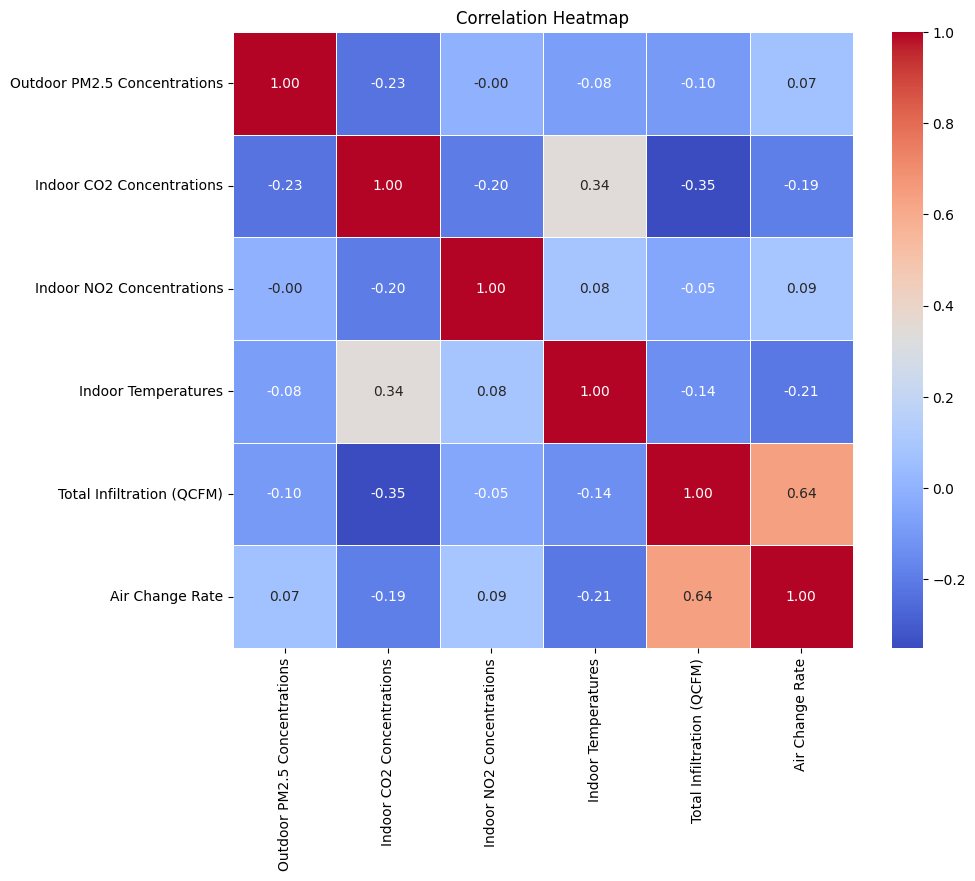

In [ ]:
#Developing a correlations matrix to identify relationship between different parameters

# Define the directory path for the first dataset
csv_directory = '/content/drive/MyDrive/Yazan/data'

# List CSV files in the directory
csv_files = [f for f in os.listdir(csv_directory) if f.endswith('.csv')]

# Lists to store mean concentrations for each parameter
mean_pm25_list = []
mean_co2_list = []
mean_no2_list = []
mean_temperature_list = []
csv_file_names = []

# Iterate through CSV files and calculate mean for each parameter
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    df = pd.read_csv(file_path)

    # PM2.5
    pm25_cols = df.columns[df.columns.str.contains('PM_MET_OUT')]
    col_name_pm25 = pm25_cols[0] if not pm25_cols.empty else None

    if col_name_pm25 is not None:
        df_pm25 = df[col_name_pm25].dropna()
        mean_pm25 = df_pm25.mean()
        mean_pm25_list.append(mean_pm25)
    else:
        print(f"PM_MET_OUT column not found in {csv_file}")
        mean_pm25_list.append(None)

    # CO2
    co2_cols = df.columns[df.columns.str.contains('CO2_ETC_IN1')]
    col_name_co2 = co2_cols[0] if not co2_cols.empty else None

    if col_name_co2 is not None:
        df_co2 = df[col_name_co2].dropna()
        mean_co2 = df_co2.mean()
        mean_co2_list.append(mean_co2)
    else:
        print(f"CO2_ETC_IN1 column not found in {csv_file}")
        mean_co2_list.append(None)

    # NO2
    no2_cols = df.columns[df.columns.str.contains('NO2_AQL_IN1')]
    col_name_no2 = no2_cols[0] if not no2_cols.empty else None

    if col_name_no2 is not None:
        df_no2 = df[col_name_no2].dropna()
        mean_no2 = df_no2.mean()
        mean_no2_list.append(mean_no2)
    else:
        print(f"NO2_AQL_IN1 column not found in {csv_file}")
        mean_no2_list.append(None)

    # Temperature
    temperature_cols = df.columns[df.columns.str.contains('T_ETC_IN1')]
    col_name_temperature = temperature_cols[0] if not temperature_cols.empty else None

    if col_name_temperature is not None:
        df_temperature = df[col_name_temperature].dropna()
        mean_temperature = df_temperature.mean()
        mean_temperature_list.append(mean_temperature)
    else:
        print(f"T_ETC_IN1 column not found in {csv_file}")
        mean_temperature_list.append(None)

    # Store CSV file name for x-axis labels
    csv_file_names.append(csv_file)

# Create a DataFrame with the mean concentrations
df_means = pd.DataFrame({
    'CSV_File': csv_file_names,
    'Outdoor PM2.5 Concentrations': mean_pm25_list,
    'Indoor CO2 Concentrations': mean_co2_list,
    'Indoor NO2 Concentrations': mean_no2_list,
    'Indoor Temperatures': mean_temperature_list
})

# Extract the last three numbers from the CSV_File column
df_means['FileNumber'] = df_means['CSV_File'].str.extract('(\d{3})')

# Define the new directory path for the second dataset
csv_directory_data2 = '/content/drive/MyDrive/Yazan/data2'

# List CSV files in the new directory
csv_files_data2 = [f for f in os.listdir(csv_directory_data2) if f.endswith('.csv')]

# Dataframe to store mean values for each CSV file in the second dataset
df_means_data2 = pd.DataFrame(columns=['CSV_File', 'Mean_QCFM_Total', 'Mean_ACH'])

# Iterate through CSV files in the new directory
for csv_file_data2 in csv_files_data2:
    file_path_data2 = os.path.join(csv_directory_data2, csv_file_data2)
    df_data2 = pd.read_csv(file_path_data2)

    # Find the column names for 'QCFM_Total' and 'ACH'
    qcfm_cols = df_data2.columns[df_data2.columns.str.contains('QCFM_Total')]
    col_name_qcfm = qcfm_cols[0] if not qcfm_cols.empty else None

    ach_cols = df_data2.columns[df_data2.columns.str.contains('ACH')]
    col_name_ach = ach_cols[0] if not ach_cols.empty else None

    if col_name_qcfm is not None and col_name_ach is not None:
        # Drop rows where either 'QCFM_Total' or 'ACH' is zero or non-existent
        df_cleaned = df_data2[(df_data2[col_name_qcfm] != 0) & (df_data2[col_name_ach] != 0)].dropna(subset=[col_name_qcfm, col_name_ach])

        # Calculate mean values
        mean_qcfm = df_cleaned[col_name_qcfm].mean()
        mean_ach = df_cleaned[col_name_ach].mean()

        # Add values to the DataFrame
        df_means_data2 = df_means_data2.append({'CSV_File': csv_file_data2, 'Total Infiltration (QCFM)': mean_qcfm, 'Air Change Rate': mean_ach}, ignore_index=True)
    else:
        print(f"'QCFM_Total' or 'ACH' columns not found in {csv_file_data2}")

# Extract the last three numbers from the CSV_File column
df_means_data2['FileNumber'] = df_means_data2['CSV_File'].str.extract('(\d{3})')

# Merge the two DataFrames on the common column 'FileNumber'
df_merged = pd.merge(df_means, df_means_data2, left_on='FileNumber', right_on='FileNumber', how='outer')

# Drop the 'FileNumber' column
df_merged = df_merged.drop(columns='FileNumber')

# Display the merged DataFrame
print(df_merged)

# Extract relevant columns for correlation analysis
columns_for_correlation = ['Outdoor PM2.5 Concentrations', 'Indoor CO2 Concentrations', 'Indoor NO2 Concentrations', 'Indoor Temperatures', 'Total Infiltration (QCFM)', 'Air Change Rate']

# Calculate correlation matrix
corr_matrix = df_merged[columns_for_correlation].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.savefig('/content/drive/MyDrive/Yazan/correlation_heatmap.png')
plt.show()


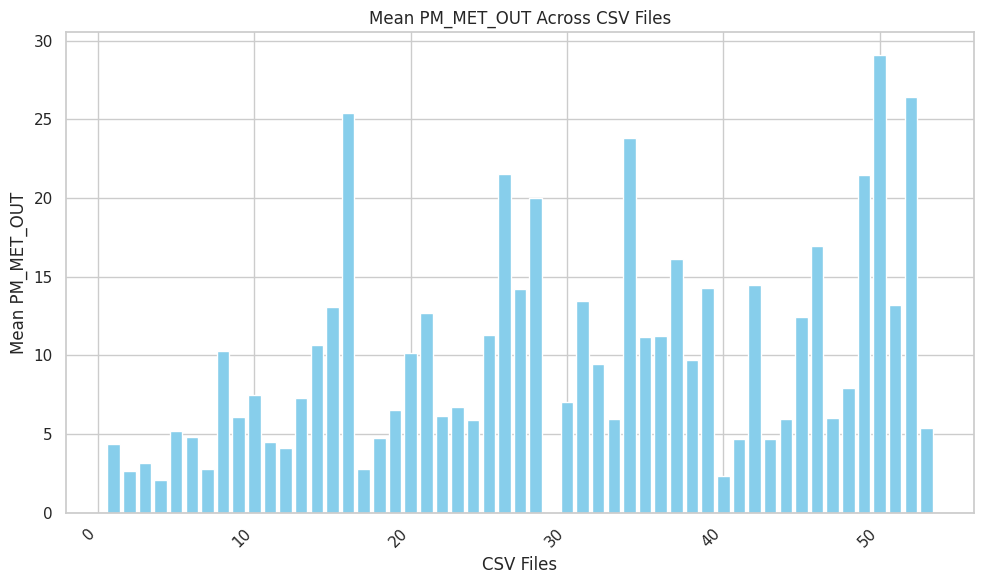

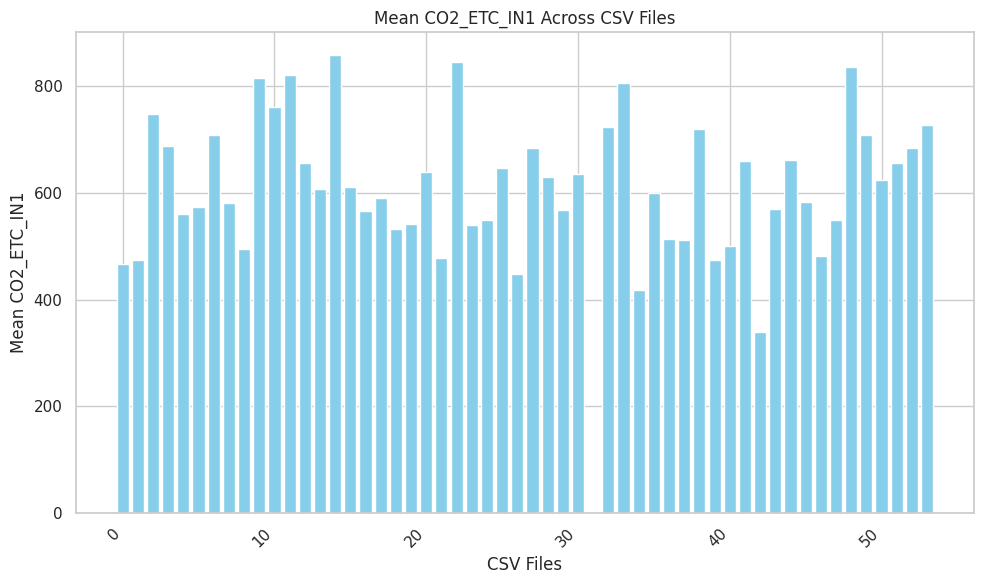

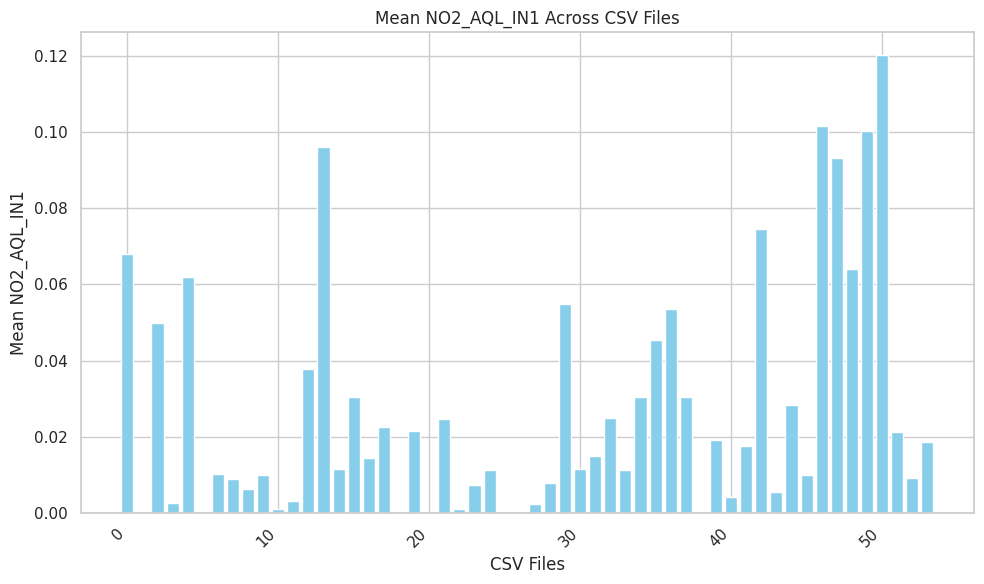

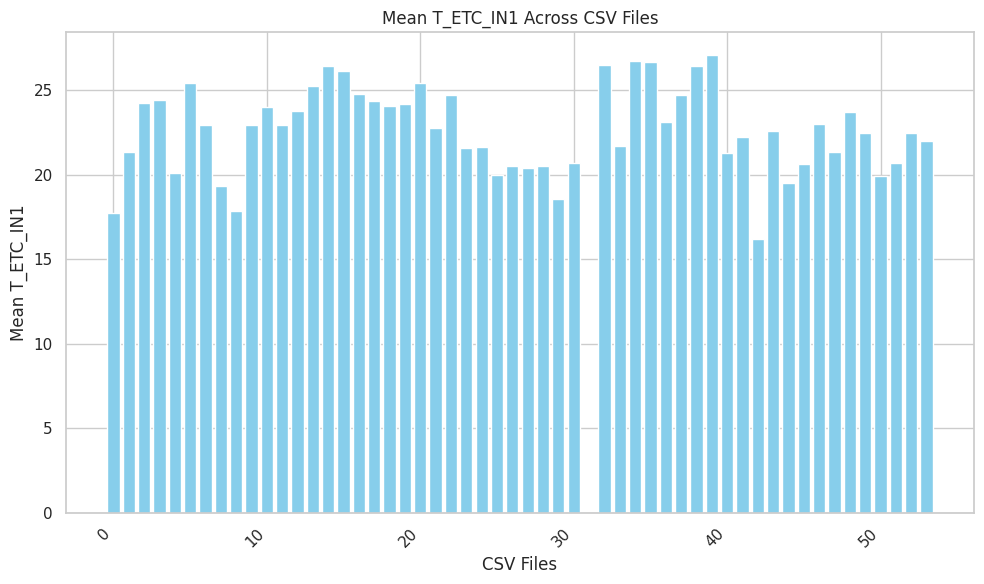

KeyError: ignored

<Figure size 1000x600 with 0 Axes>

In [ ]:
#Developing more visualizations

# Merge the two dataframes on the common column (e.g., 'CSV_File' or any other common identifier)
df_merged = pd.merge(df_means, df_means_data2, left_index=True, right_index=True, how='outer')

# Plot bar plots for each parameter
parameters = ['PM_MET_OUT', 'CO2_ETC_IN1', 'NO2_AQL_IN1', 'T_ETC_IN1', 'QCFM_Total', 'ACH']

for parameter in parameters:
    plt.figure(figsize=(10, 6))
    plt.bar(df_merged.index, df_merged[parameter], color='skyblue')
    plt.xlabel('CSV Files')
    plt.ylabel(f'Mean {parameter}')
    plt.title(f'Mean {parameter} Across CSV Files')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [ ]:
#developing a one big table to include data from across all 6 parameters, including PM2.5, NO2, CO2, QCFM, ACH

# Define the directory paths for both sets of data
csv_directory_data1 = '/content/drive/MyDrive/Yazan/data'
csv_directory_data2 = '/content/drive/MyDrive/Yazan/data2'

# List CSV files in the first directory
csv_files_data1 = [f for f in os.listdir(csv_directory_data1) if f.endswith('.csv')]

# Dataframe to store mean values for each CSV file
df_means = pd.DataFrame(columns=['Home_ID', 'Mean_CO2', 'Mean_NO2', 'Mean_PM25', 'Mean_Temperature', 'Mean_QCFM_Total', 'Mean_ACH'])

# Iterate through CSV files in the first directory and calculate mean for different parameters
for csv_file_data1 in csv_files_data1:
    file_path_data1 = os.path.join(csv_directory_data1, csv_file_data1)
    df_data1 = pd.read_csv(file_path_data1)

    # Extract the last three digits from the file name
    home_id = int(''.join(filter(str.isdigit, csv_file_data1[-7:-4])))

    # Try to find the column name for CO2 containing 'CO2'
    matching_cols_co2 = df_data1.columns[df_data1.columns.str.contains('CO2', case=False)].tolist()
    col_name_co2 = matching_cols_co2[0] if matching_cols_co2 else None

    # Calculate mean CO2 concentration if the column exists
    mean_co2 = df_data1[col_name_co2].mean() if col_name_co2 else None

    # Try to find the column name for NO2 containing 'NO2'
    matching_cols_no2 = df_data1.columns[df_data1.columns.str.contains('NO2', case=False)].tolist()
    col_name_no2 = matching_cols_no2[0] if matching_cols_no2 else None

    # Calculate mean NO2 concentration if the column exists
    mean_no2 = df_data1[col_name_no2].mean() if col_name_no2 else None

    # Attempting to find the column name for PM2.5 containing 'PM2.5'
    matching_cols_pm25 = df_data1.columns[df_data1.columns.str.contains('PM2.5', case=False)].tolist()
    col_name_pm25 = matching_cols_pm25[0] if matching_cols_pm25 else df_data1.columns[1]
    df_cleaned_pm25 = df_data1.dropna(subset=[col_name_pm25])
    df_cleaned_pm25[col_name_pm25] = pd.to_numeric(df_cleaned_pm25[col_name_pm25], errors='coerce')
    mean_pm25 = df_cleaned_pm25[col_name_pm25].mean()

    # Attempting to find the column name for temperature containing 'Temperature'
    matching_cols_temp = df_data1.columns[df_data1.columns.str.contains('Temperature', case=False)].tolist()
    col_name_temp = matching_cols_temp[0] if matching_cols_temp else df_data1.columns[12]

    # Dropping rows with non-numeric values in the specified temperature column
    df_cleaned_temp = df_data1.dropna(subset=[col_name_temp])
    df_cleaned_temp[col_name_temp] = pd.to_numeric(df_cleaned_temp[col_name_temp], errors='coerce')

    # Calculate the mean of the specified temperature column
    mean_temperature = df_cleaned_temp[col_name_temp].mean()

    # Add values to the DataFrame
    df_means = df_means.append({
        'Home_ID': home_id,
        'Mean_CO2': mean_co2,
        'Mean_NO2': mean_no2,
        'Mean_PM25': mean_pm25,
        'Mean_Temperature': mean_temperature,
    }, ignore_index=True)

# Iterate through CSV files in the second directory and calculate mean for QCFM and ACH
csv_files_data2 = [f for f in os.listdir(csv_directory_data2) if f.endswith('.csv')]

for csv_file_data2 in csv_files_data2:
    file_path_data2 = os.path.join(csv_directory_data2, csv_file_data2)
    df_data2 = pd.read_csv(file_path_data2)

    # Extract the last three digits from the file name
    home_id = int(''.join(filter(str.isdigit, csv_file_data2[-7:-4])))

    # Find the column names for 'QCFM_Total' and 'ACH'
    qcfm_cols = df_data2.columns[df_data2.columns.str.contains('QCFM_Total')]
    col_name_qcfm = qcfm_cols[0] if not qcfm_cols.empty else None

    ach_cols = df_data2.columns[df_data2.columns.str.contains('ACH')]
    col_name_ach = ach_cols[0] if not ach_cols.empty else None

    # Drop rows where either 'QCFM_Total' or 'ACH' is zero or non-existent
    if col_name_qcfm is not None and col_name_ach is not None:
        df_cleaned_qcfm_ach = df_data2[(df_data2[col_name_qcfm] != 0) & (df_data2[col_name_ach] != 0)].dropna(subset=[col_name_qcfm, col_name_ach])

        # Calculate mean values
        mean_qcfm = df_cleaned_qcfm_ach[col_name_qcfm].mean()
        mean_ach = df_cleaned_qcfm_ach[col_name_ach].mean()

        # Update the existing row in the DataFrame
        df_means.loc[df_means['Home_ID'] == home_id, ['Mean_QCFM_Total', 'Mean_ACH']] = mean_qcfm, mean_ach
    else:
        print(f"'QCFM_Total' or 'ACH' columns not found in {csv_file_data2}")

# Display the DataFrame with mean values for CO2, NO2, PM2.5, Temperature, QCFM, and ACH
print(df_means)

df_means.to_csv('/content/drive/MyDrive/Yazan/merged_data.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-9-723d8e266725>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_means = df_means.append({
<ipython-input-9-723d8e266725>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_means = df_means.append({
<ipython-input-9-723d8e266725>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_means = df_means.append({
<ipython-input-9-723d8e266725>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_means = df_means.append({
<ipython-input-9-723d8e266725>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_means = df_means.append({
<ipyt

'QCFM_Total' or 'ACH' columns not found in Qtotal003.csv
'QCFM_Total' or 'ACH' columns not found in Qtotal005.csv
'QCFM_Total' or 'ACH' columns not found in Qtotal006.csv
'QCFM_Total' or 'ACH' columns not found in Qtotal029.csv
    Home_ID    Mean_CO2  Mean_NO2  Mean_PM25  Mean_Temperature  \
0      25.0  466.213185  0.067881   3.652762         17.771376   
1      27.0  474.563777       NaN   4.004088         21.765287   
2      28.0  748.613481  0.049854   2.690326         24.190609   
3      29.0  688.930091  0.002551   3.142132         24.425605   
4      30.0  561.175768  0.061929   3.179017         20.085693   
..      ...         ...       ...        ...               ...   
65     59.0  548.841949  0.011300   4.378410         21.109670   
66     63.0  646.744082       NaN   3.883027         19.867371   
67     65.0  447.666277       NaN   4.438913         20.053943   
68     66.0  683.622652  0.002415   2.722641         20.335760   
69     68.0  629.821038  0.007794   2.534763  